# some additional benchmarksZ

In [ ]:
#first we will load in data



In [1]:
import numpy as np
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt
def predict_snp_effect_scores(ref_prob_preds, alt_prob_preds, logged=False, ref_logcount_preds=None, alt_count_preds=None):
    '''
    Predicts variant effect scores based on model predictions.

    Arguments::
       ref_logcount_preds: log count predictions at the reference allele with size (N,)
       alt_logcount_preds: log count predictions at the alternate alele with size (N,)
       ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
       alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
    Returns:
        log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
        log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
        probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
    '''
    if ref_logcount_preds is not None and alt_count_preds is not None:
        log_counts_diff = alt_count_preds - ref_logcount_preds
    else:
        log_counts_diff = 1
    # log_counts_diff = np.mean(alt_prob_preds, axis=1) - np.mean(ref_prob_preds, axis=1) #model doesn't have count prediction head, so it's really bad!
    # log_counts_diff = alt_count_preds - ref_count_preds
    if logged:
        log_probs_diff_abs_sum =  np.sum(np.abs((alt_prob_preds) -  (ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
        ref_prob_preds = sigmoid(ref_prob_preds)
        alt_prob_preds = sigmoid(alt_prob_preds)
    else:
        log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)
    integrative_effect_size = log_probs_diff_abs_sum * probs_jsd_diff

    return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff, integrative_effect_size

# m0 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_0.npy')
# m50 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_50.npy')
# m100 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_100.npy')
# m1000 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_1000.npy')
# m2000 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_2000.npy')

#list of files is "nomlm_dsqtl.npy" "15mlm_dsqtl.npy" "new_acc_dsqtl.npy" "no_acc_input_dsqtl.npy"
nomlm = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/nomlm_dsqtl.npy')
m15 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/15mlm_dsqtl.npy')
new_acc = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/new_acc_dsqtl.npy')
no_acc_in = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/no_acc_input_dsqtl.npy')

print(nomlm.shape, m15.shape, new_acc.shape, no_acc_in.shape)

(17506, 500, 2) (17506, 500, 2) (17506, 500, 2) (17506, 500, 2)


In [3]:
out_list = []
for i in [nomlm, m15, new_acc, no_acc_in]:
    out = predict_snp_effect_scores(i[:,:,0], i[:,:,1])
    out_list.append(out)

In [4]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pandas as pd
qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
def plot_metrics(out, labels, title):
    model_names = ['logfc', 'JSD', 'IED']
    colors = ['blue', 'green', 'red']

    plt.figure(figsize=(12, 5))

    # === ROC Curve ===
    plt.subplot(1, 2, 1)
    for i in range(3):
        fpr, tpr, _ = roc_curve(labels, out[i+1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.3f})', color=colors[i])

    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # === Precision-Recall Curve ===
    plt.subplot(1, 2, 2)
    for i in range(3):
        precision, recall, _ = precision_recall_curve(labels, out[i+1])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{model_names[i]} (AUC = {pr_auc:.3f})', color=colors[i])

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
labels = qtls['label'].to_numpy()

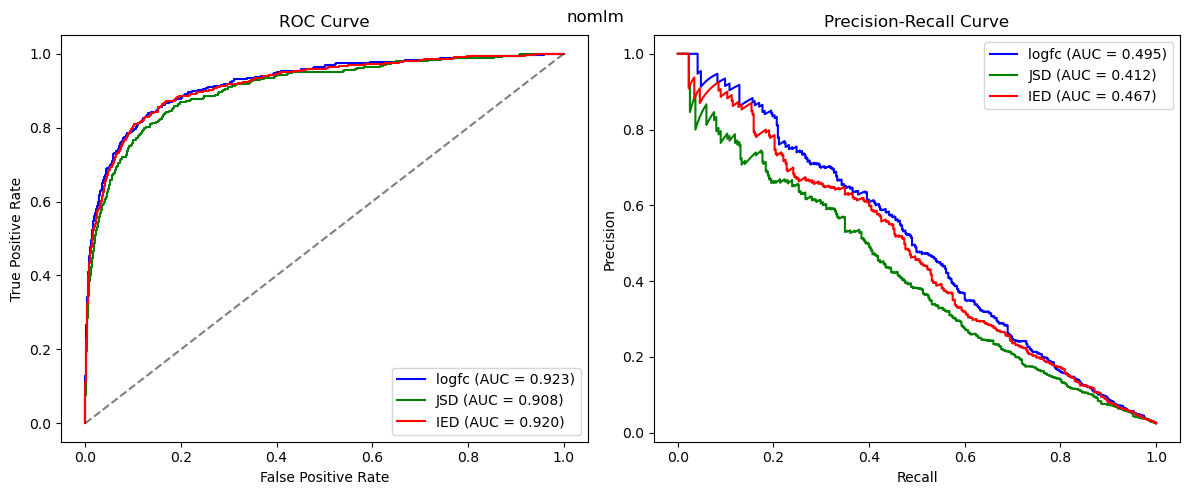

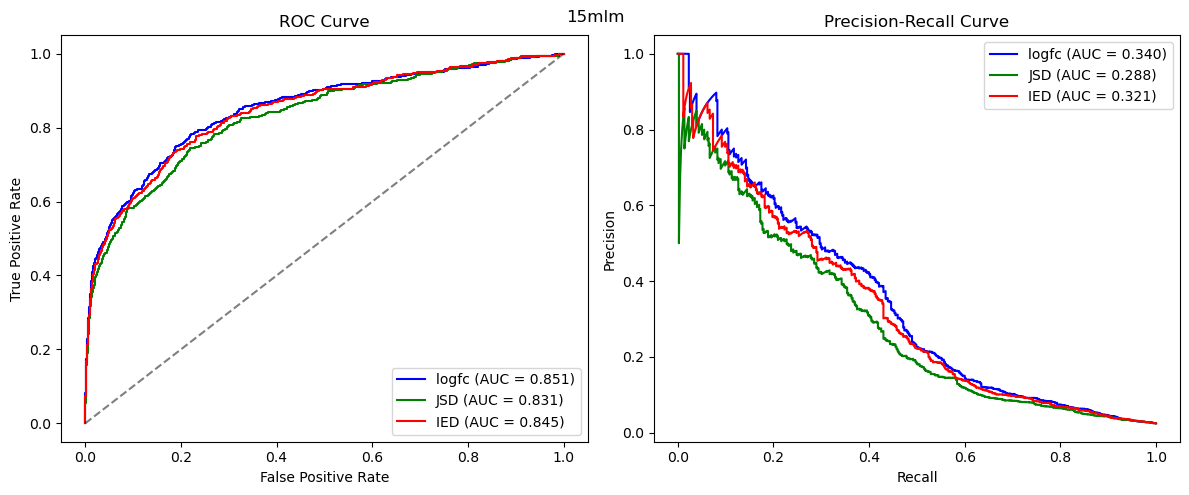

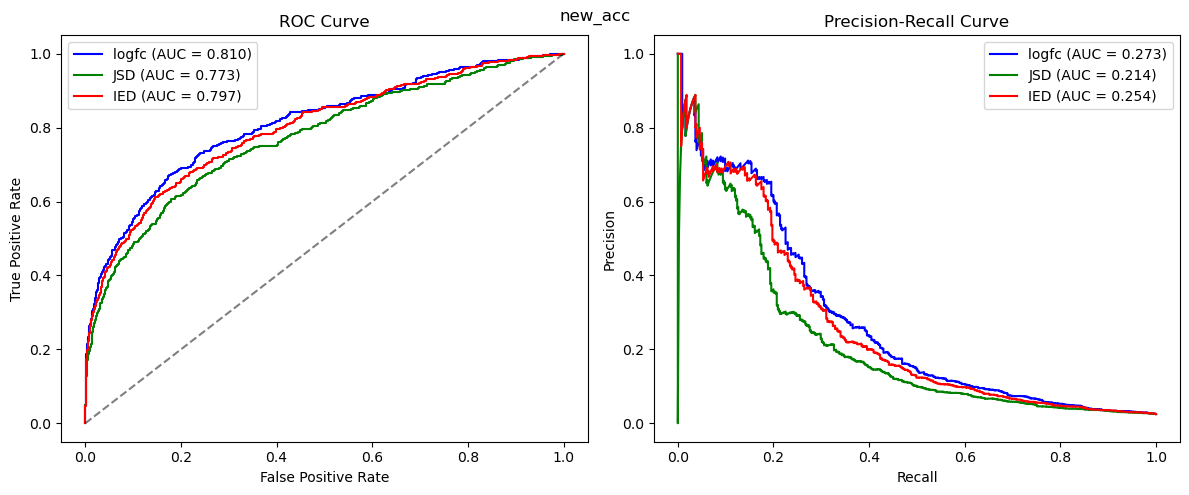

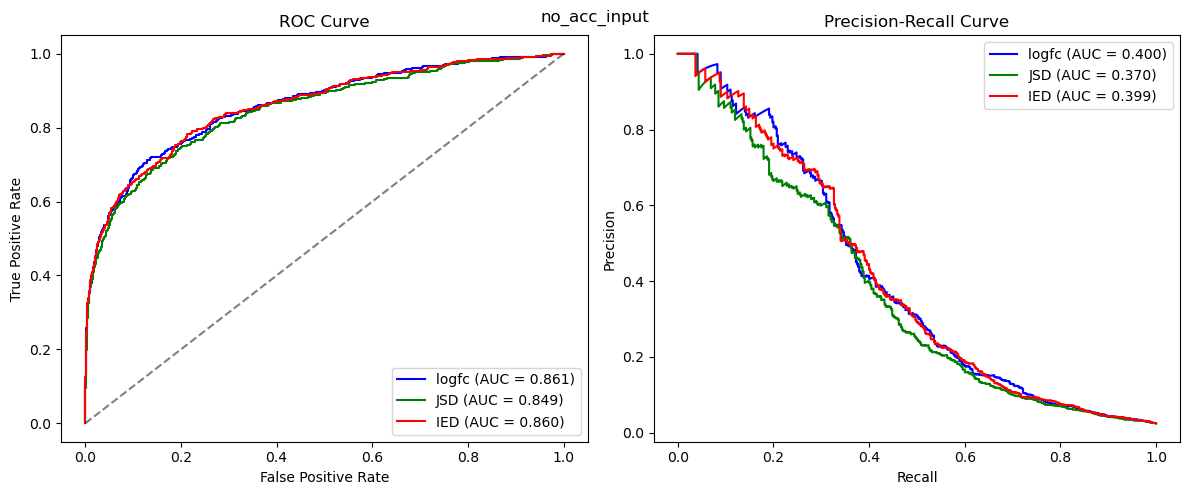

In [6]:
titles = ['nomlm', '15mlm', 'new_acc', 'no_acc_input']
for i in range(len(out_list)):
    plot_metrics(out_list[i], labels, titles[i])

# another enformer

In [2]:

import numpy as np
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt
def predict_snp_effect_scores(ref_prob_preds, alt_prob_preds, logged=False, ref_logcount_preds=None, alt_count_preds=None):
    '''
    Predicts variant effect scores based on model predictions.

    Arguments::
       ref_logcount_preds: log count predictions at the reference allele with size (N,)
       alt_logcount_preds: log count predictions at the alternate alele with size (N,)
       ref_prob_preds: profile probability predictions at the reference allele with size (N,outputlen). outputlen depends on the model.
       alt_prob_preds:  profile probability predictions at the alternate allele with size (N,outputlen). outputlen depends on the model.
    
    Returns:
        log_counts_diff: difference in log count predictions of alternate and reference allele (N,)
        log_probs_diff_abs_sum: Sum of absolute difference in log probability prediction of alternate and reference allele per base. (N,)
        probs_jsd_diff: Jensenshannon distance between probability predictions of alternate and reference allele (N,)
    '''
    if ref_logcount_preds is not None and alt_count_preds is not None:
        log_counts_diff = alt_count_preds - ref_logcount_preds
    else:
        log_counts_diff = 1
    # log_counts_diff = np.mean(alt_prob_preds, axis=1) - np.mean(ref_prob_preds, axis=1) #model doesn't have count prediction head, so it's really bad!
    # log_counts_diff = alt_count_preds - ref_count_preds
    if logged:
        log_probs_diff_abs_sum =  np.sum(np.abs((alt_prob_preds) -  (ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
        ref_prob_preds = sigmoid(ref_prob_preds)
        alt_prob_preds = sigmoid(alt_prob_preds)
    else:
        log_probs_diff_abs_sum =  np.sum(np.abs(np.log(alt_prob_preds) -  np.log(ref_prob_preds)),axis=1)*np.sign(log_counts_diff)
    probs_jsd_diff = np.array([jensenshannon(x,y) for x,y in zip(alt_prob_preds, ref_prob_preds)])*np.sign(log_counts_diff)
    integrative_effect_size = log_probs_diff_abs_sum * probs_jsd_diff

    return log_counts_diff, log_probs_diff_abs_sum, probs_jsd_diff, integrative_effect_size

# m0 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_0.npy')
# m50 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_50.npy')
# m100 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_100.npy')
# m1000 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_1000.npy')
# m2000 = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/base_dsqtl_mask_2000.npy')

#list of files is "nomlm_dsqtl.npy" "15mlm_dsqtl.npy" "new_acc_dsqtl.npy" "no_acc_input_dsqtl.npy"
enformer_retrained = np.load('/data1/lesliec/sarthak/data/joint_playground/dsQTL/enformer_dsqtl_retrained-dsqtl.npy')

from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pandas as pd
qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
def plot_metrics(out, labels, title):
    model_names = ['logfc', 'JSD', 'IED']
    colors = ['blue', 'green', 'red']

    plt.figure(figsize=(12, 5))

    # === ROC Curve ===
    plt.subplot(1, 2, 1)
    for i in range(3):
        fpr, tpr, _ = roc_curve(labels, out[i+1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.3f})', color=colors[i])

    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # === Precision-Recall Curve ===
    plt.subplot(1, 2, 2)
    for i in range(3):
        precision, recall, _ = precision_recall_curve(labels, out[i+1])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{model_names[i]} (AUC = {pr_auc:.3f})', color=colors[i])

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
labels = qtls['label'].to_numpy()

In [5]:
out = predict_snp_effect_scores(enformer_retrained[:,:,0], enformer_retrained[:,:,1])

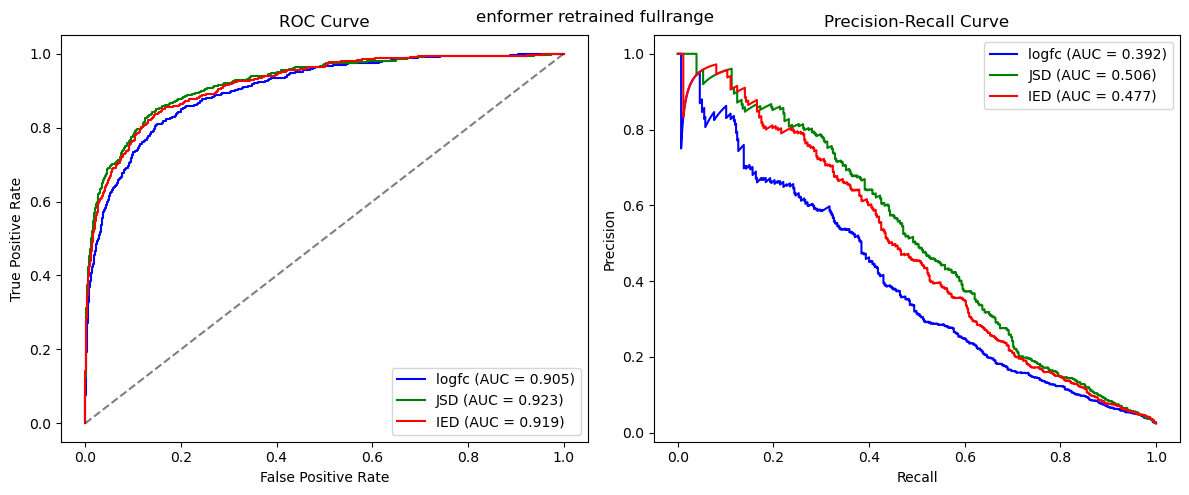

In [8]:
plot_metrics(out, labels, 'enformer retrained fullrange')

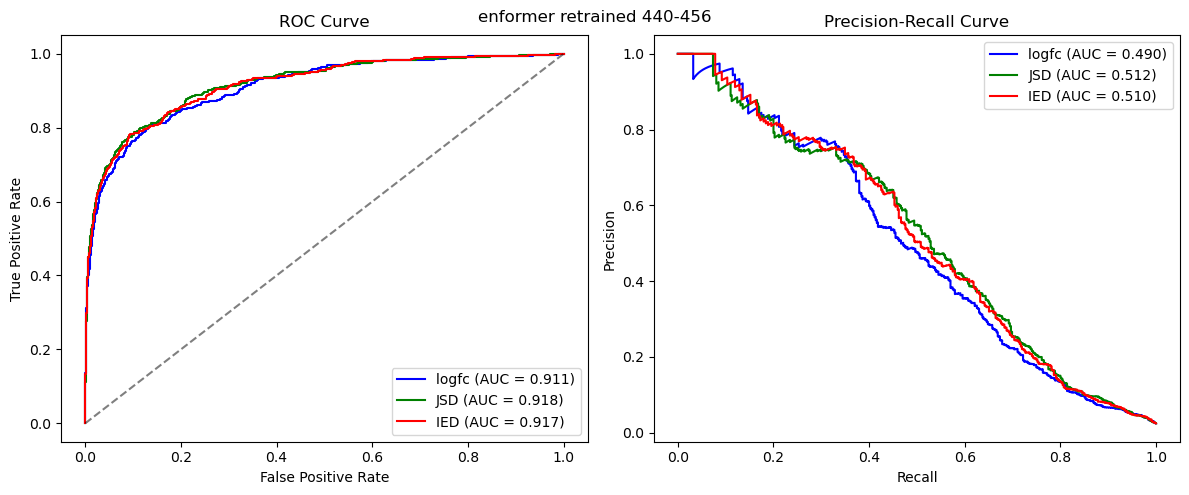

In [3]:
out = predict_snp_effect_scores(enformer_retrained[:,440:456,0], enformer_retrained[:,440:456,1])
plot_metrics(out, labels, 'enformer retrained 440-456')

# do chrombpnet using fixes from dsqtl benchmark 4

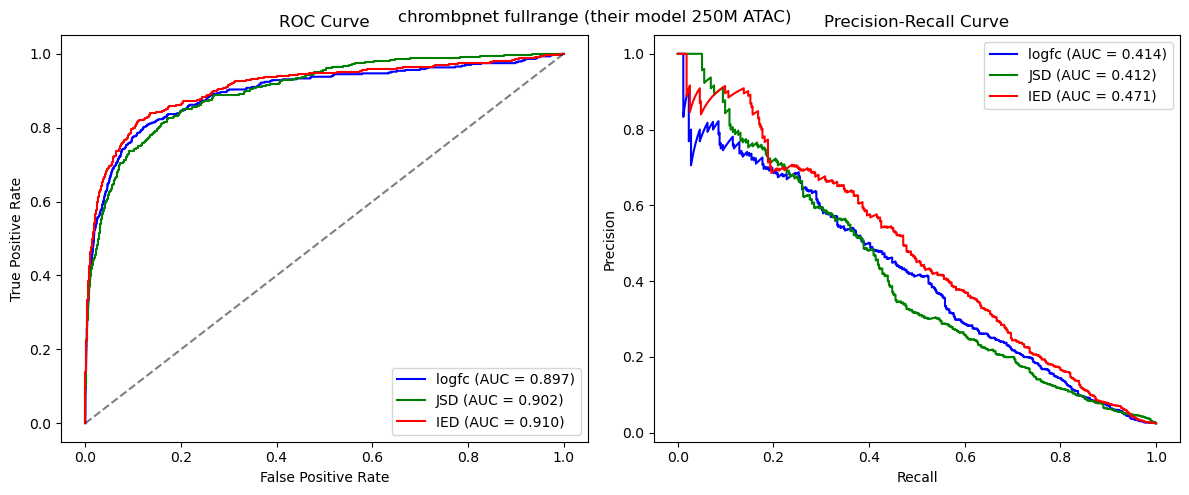

In [8]:
import numpy as np
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt
def softmax(x, temp=1):
    norm_x = x - np.mean(x, axis=1, keepdims=True)
    return np.exp(temp*norm_x)/np.sum(np.exp(temp*norm_x), axis=1, keepdims=True)

def get_variant_scores(allele1_pred_counts, allele2_pred_counts,
                       allele1_pred_profiles, allele2_pred_profiles):

    # print('allele1_pred_counts shape:', allele1_pred_counts.shape)
    # print('allele2_pred_counts shape:', allele2_pred_counts.shape)
    # print('allele1_pred_profiles shape:', allele1_pred_profiles.shape)
    # print('allele2_pred_profiles shape:', allele2_pred_profiles.shape)

    logfc = np.squeeze(np.log2(allele2_pred_counts / allele1_pred_counts))
    jsd = np.squeeze([jensenshannon(x, y, base=2.0)
                     for x,y in zip(softmax(allele2_pred_profiles),
                                    softmax(allele1_pred_profiles))])
    ies = logfc * jsd
    return logfc, jsd, ies

pred_cbp2 = np.load('/data1/lesliec/sarthak/data/joint_playground/chrombpnet/dsqtl_models/var_preds.npz')

out2 = get_variant_scores(np.exp(pred_cbp2['counts'][:,0,0]), np.exp(pred_cbp2['counts'][:,0,1]), pred_cbp2['profile'][:,:,0], pred_cbp2['profile'][:,:,1])

from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pandas as pd
qtls = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/dsQTL/filtered_dsqtls.txt', sep='\t')
def plot_metrics(out, labels, title):
    model_names = ['logfc', 'JSD', 'IED']
    colors = ['blue', 'green', 'red']

    plt.figure(figsize=(12, 5))

    # === ROC Curve ===
    plt.subplot(1, 2, 1)
    for i in range(3):
        fpr, tpr, _ = roc_curve(labels, np.abs(out[i]))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.3f})', color=colors[i])

    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # === Precision-Recall Curve ===
    plt.subplot(1, 2, 2)
    for i in range(3):
        precision, recall, _ = precision_recall_curve(labels, np.abs(out[i]))
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{model_names[i]} (AUC = {pr_auc:.3f})', color=colors[i])

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
labels = qtls['label'].to_numpy()

plot_metrics(out2, labels, 'chrombpnet fullrange (their model 250M ATAC)')

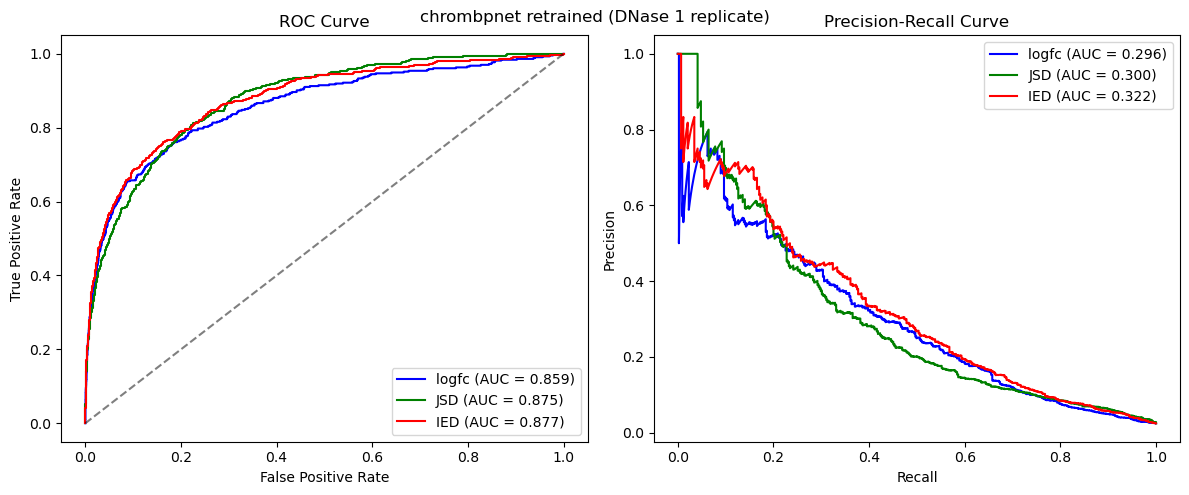

In [ ]:
pred_cbp = '/data1/lesliec/sarthak/data/joint_playground/chrombpnet/GM12878_Tcellbias/var_prds.npz'
pred_cbp = np.load(pred_cbp)
out2 = get_variant_scores(np.exp(pred_cbp['counts'][:,0,0]), np.exp(pred_cbp['counts'][:,0,1]), pred_cbp['profile'][:,:,0], pred_cbp['profile'][:,:,1])
plot_metrics(out2, labels, 'chrombpnet retrained (DNase 1 replicate)')

In [ ]:
#point is calculate chrombpnet differently because it has count head and weird profile thing, we don't need to do this for ourself! Output true counts, not needed softmax for probs and no count head, just average counts!

In [ ]:
pred_cbp_multifold = '/data1/lesliec/sarthak/data/joint_playground/chrombpnet/dsqtl_models/var_preds_allfolds.npz'
pred_cbp_multifold = np.load(pred_cbp_multifold)
out2 = get_variant_scores(np.exp(pred_cbp_multifold['counts'][:,0,0]), np.exp(pred_cbp_multifold['counts'][:,0,1]), pred_cbp_multifold['profile'][:,:,0], pred_cbp_multifold['profile'][:,:,1])
plot_metrics(out2, labels, 'chrombpnet retrained (DNase 1 replicate) multi-fold')